### 引入資料

In [2]:
import numpy as np
x1 = np.random.rand(500)
x2 = np.random.rand(500) + 1
x3 = np.random.rand(500) + 2
x_train = np.concatenate([x1, x2, x3])
x_train = x_train.reshape((1500,1))
print(x_train.shape)

y1 = np.zeros(500, dtype=int)
y2 = np.ones(500, dtype=int)
y3 = np.ones(500, dtype=int) + 1
y_train = np.concatenate([y1, y2, y3])

import tensorflow as tf
y_train2 = tf.keras.utils.to_categorical(y_train)

print(y_train2.shape)

(1500, 1)
(1500, 3)


In [4]:
"""
activation: https://keras.io/zh/activations/
"""
model = tf.keras.Sequential()

# input layer: 50個神經元, 激活函數使用relu, 輸入一維資料
model.add(tf.keras.layers.Dense(units=50,activation=tf.nn.relu,input_dim=1))

# output layer: 3個神經元(代表3個結果), 激活函數使用softmax
model.add(tf.keras.layers.Dense(units=3,activation=tf.nn.softmax))

"""
optimizaer: https://keras.io/zh/optimizers/
metrics: https://keras.io/zh/metrics/
loss: https://keras.io/zh/losses/
"""
#model.compile(optimizer='adam',
#       loss = tf.keras.losses.categorical_crossentropy,
#       metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy'])

model.summary()

"""
Param #: (input_dim+1)*units
"""

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                100       
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


'\nParam #: (input_dim+1)*units\n'

### 訓練模型

In [ ]:
history = model.fit(x_train, y_train2, epochs=20, batch_size=64)

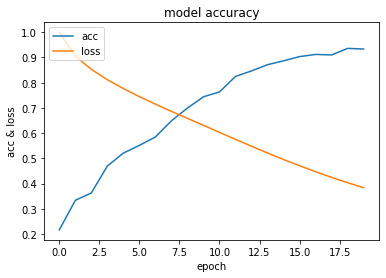

In [6]:
loss = np.array(history.history['loss'], dtype='float64')
loss = loss/max(loss)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(loss)
plt.title('model accuracy')
plt.ylabel('acc & loss')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

### 評估正確率

In [7]:
x_test = np.array([0.22, 1.31, 2.82])
y_test = np.array([0, 1, 2])
y_test2 = tf.keras.utils.to_categorical(y_test, num_classes=3)
score = model.evaluate(x_test, y_test2, batch_size=128)
print("score:",score)

1/1 [==============================] - 0s 161ms/step - loss: 0.3150 - accuracy: 1.0000
score: [0.3149518072605133, 1.0]


In [8]:
x_test = np.array([0.29,1.61,2.02,2.88])

predict = model.predict(x_test)

print("第一個測試資料:", x_test[0])
print("0 機率:",predict[0][0])
print("1 機率:",predict[0][1])
print("2 機率:",predict[0][2])
print("Ans:",np.argmax(predict[0])) # np.argmax() 返回最大值索引號

print("----------------------------------")

print("第二個測試資料:", x_test[1])
print("0 機率:",predict[1][0])
print("1 機率:",predict[1][1])
print("2 機率:",predict[1][2])
print("Ans:",np.argmax(predict[1])) # np.argmax() 返回最大值索引號

print("----------------------------------")

print("第三個測試資料:", x_test[2])
print("0 機率:",predict[2][0])
print("1 機率:",predict[2][1])
print("2 機率:",predict[2][2])
print("Ans:",np.argmax(predict[2])) # np.argmax() 返回最大值索引號

print("----------------------------------")

print("第四個測試資料:", x_test[3])
print("0 機率:",predict[3][0])
print("1 機率:",predict[3][1])
print("2 機率:",predict[3][2])
print("Ans:",np.argmax(predict[3])) # np.argmax() 返回最大值索引號

第一個測試資料: 0.29
0 機率: 0.7954958
1 機率: 0.1728455
2 機率: 0.031658787
Ans: 0
----------------------------------
第二個測試資料: 1.61
0 機率: 0.08529136
1 機率: 0.5408543
2 機率: 0.3738544
Ans: 1
----------------------------------
第三個測試資料: 2.02
0 機率: 0.017507926
1 機率: 0.39272594
2 機率: 0.58976614
Ans: 2
----------------------------------
第四個測試資料: 2.88
0 機率: 0.00036417594
1 機率: 0.115626104
2 機率: 0.8840097
Ans: 2
